In [148]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import sklearn
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.preprocessing import sequence
from keras import metrics 
from sklearn.model_selection import StratifiedKFold
from livelossplot import PlotLossesKeras
import seaborn as sns

NORMAL_INPUT_DATA_DIR = "./split_data/normal/"

# normal_files = []

# for (dirpath, dirnames, filenames) in os.walk(NORMAL_INPUT_DATA_DIR):
#     normal_files.extend(filenames)
#     break
# print(normal_files)

In [73]:
FAULT_INPUT_DATA_DIR = "./split_data/fault/"

# fault_files = []

# for (dirpath, dirnames, filenames) in os.walk(FAULT_INPUT_DATA_DIR):
#     fault_files.extend(filenames)
#     break
# print(fault_files)

['data10_fault.csv', 'data11_fault.csv', 'data12_fault.csv', 'data13_fault.csv', 'data14_fault.csv', 'data15_fault.csv', 'data16_fault.csv', 'data17_fault.csv', 'data18_fault.csv', 'data19_fault.csv', 'data1_fault.csv', 'data20_fault.csv', 'data21_fault.csv', 'data22_fault.csv', 'data23_fault.csv', 'data24_fault.csv', 'data25_fault.csv', 'data26_fault.csv', 'data27_fault.csv', 'data28_fault.csv', 'data29_fault.csv', 'data2_fault.csv', 'data30_fault.csv', 'data31_fault.csv', 'data32_fault.csv', 'data33_fault.csv', 'data34_fault.csv', 'data35_fault.csv', 'data36_fault.csv', 'data37_fault.csv', 'data38_fault.csv', 'data39_fault.csv', 'data3_fault.csv', 'data40_fault.csv', 'data41_fault.csv', 'data42_fault.csv', 'data43_fault.csv', 'data44_fault.csv', 'data45_fault.csv', 'data46_fault.csv', 'data47_fault.csv', 'data48_fault.csv', 'data49_fault.csv', 'data4_fault.csv', 'data50_fault.csv', 'data51_fault.csv', 'data52_fault.csv', 'data53_fault.csv', 'data54_fault.csv', 'data5_fault.csv', 'dat

In [74]:
def get_data(intput_dir):
    data = []

    for (dirpath, dirnames, filenames) in os.walk(intput_dir):
        for filename in filenames:
            try:
                path = intput_dir+"/" + filename
                frame = pd.read_csv(path, header=None)
#                 print(frame)
                if frame.to_numpy().shape == (31,10):
                    data.append(frame.to_numpy().tolist())
            except :
                 print("An exception occurred")
        
    return np.array(data)[:,:,1:10]
        
    
    

In [75]:
# normal_data = get_data(NORMAL_INPUT_DATA_DIR)
# fault_data = get_data(FAULT_INPUT_DATA_DIR)
# print(normal_data.shape)
# print(fault_data.shape)
# # print(normal_data[0][0])

An exception occurred
(53, 31, 9)
(54, 31, 9)


In [76]:
# dataset = np.concatenate((normal_data, fault_data))
# print(dataset.shape)
# X_train = sequence.pad_sequences(dataset, maxlen=31)
# targets = np.concatenate((np.zeros(len(normal_data)), np.ones(len(fault_data))))
# print(targets.shape)

(107, 31, 9)
(107,)


In [108]:
# n_timesteps=31
# n_features=9
# n_outputs=1

# model = Sequential()
# model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
# model.add(Dropout(0.5))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(n_outputs, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# model.fit(dataset, targets, epochs=400, batch_size=4, verbose=2)

Epoch 1/400
27/27 - 1s - loss: 0.7011 - accuracy: 0.5327 - 934ms/epoch - 35ms/step
Epoch 2/400
27/27 - 0s - loss: 0.7122 - accuracy: 0.5047 - 79ms/epoch - 3ms/step
Epoch 3/400
27/27 - 0s - loss: 0.6829 - accuracy: 0.5514 - 73ms/epoch - 3ms/step
Epoch 4/400
27/27 - 0s - loss: 0.6318 - accuracy: 0.6355 - 76ms/epoch - 3ms/step
Epoch 5/400
27/27 - 0s - loss: 0.6733 - accuracy: 0.6075 - 76ms/epoch - 3ms/step
Epoch 6/400
27/27 - 0s - loss: 0.6639 - accuracy: 0.6636 - 76ms/epoch - 3ms/step
Epoch 7/400
27/27 - 0s - loss: 0.6442 - accuracy: 0.6168 - 76ms/epoch - 3ms/step
Epoch 8/400
27/27 - 0s - loss: 0.6620 - accuracy: 0.6262 - 77ms/epoch - 3ms/step
Epoch 9/400
27/27 - 0s - loss: 0.6434 - accuracy: 0.6262 - 76ms/epoch - 3ms/step
Epoch 10/400
27/27 - 0s - loss: 0.6112 - accuracy: 0.6729 - 77ms/epoch - 3ms/step
Epoch 11/400
27/27 - 0s - loss: 0.6145 - accuracy: 0.6636 - 78ms/epoch - 3ms/step
Epoch 12/400
27/27 - 0s - loss: 0.6050 - accuracy: 0.6542 - 78ms/epoch - 3ms/step
Epoch 13/400
27/27 - 0s

Epoch 101/400
27/27 - 0s - loss: 0.4725 - accuracy: 0.7664 - 77ms/epoch - 3ms/step
Epoch 102/400
27/27 - 0s - loss: 0.5428 - accuracy: 0.7290 - 78ms/epoch - 3ms/step
Epoch 103/400
27/27 - 0s - loss: 0.4876 - accuracy: 0.7664 - 77ms/epoch - 3ms/step
Epoch 104/400
27/27 - 0s - loss: 0.5142 - accuracy: 0.7383 - 75ms/epoch - 3ms/step
Epoch 105/400
27/27 - 0s - loss: 0.5232 - accuracy: 0.6916 - 76ms/epoch - 3ms/step
Epoch 106/400
27/27 - 0s - loss: 0.4788 - accuracy: 0.7664 - 76ms/epoch - 3ms/step
Epoch 107/400
27/27 - 0s - loss: 0.4720 - accuracy: 0.7477 - 76ms/epoch - 3ms/step
Epoch 108/400
27/27 - 0s - loss: 0.4854 - accuracy: 0.7196 - 80ms/epoch - 3ms/step
Epoch 109/400
27/27 - 0s - loss: 0.5037 - accuracy: 0.7383 - 77ms/epoch - 3ms/step
Epoch 110/400
27/27 - 0s - loss: 0.5650 - accuracy: 0.7009 - 75ms/epoch - 3ms/step
Epoch 111/400
27/27 - 0s - loss: 0.4475 - accuracy: 0.7944 - 76ms/epoch - 3ms/step
Epoch 112/400
27/27 - 0s - loss: 0.5055 - accuracy: 0.7477 - 75ms/epoch - 3ms/step
Epoc

Epoch 200/400
27/27 - 0s - loss: 0.3427 - accuracy: 0.8318 - 75ms/epoch - 3ms/step
Epoch 201/400
27/27 - 0s - loss: 0.4510 - accuracy: 0.7664 - 74ms/epoch - 3ms/step
Epoch 202/400
27/27 - 0s - loss: 0.3418 - accuracy: 0.8224 - 75ms/epoch - 3ms/step
Epoch 203/400
27/27 - 0s - loss: 0.4503 - accuracy: 0.7850 - 74ms/epoch - 3ms/step
Epoch 204/400
27/27 - 0s - loss: 0.4882 - accuracy: 0.7664 - 74ms/epoch - 3ms/step
Epoch 205/400
27/27 - 0s - loss: 0.3914 - accuracy: 0.7850 - 75ms/epoch - 3ms/step
Epoch 206/400
27/27 - 0s - loss: 0.4043 - accuracy: 0.8411 - 73ms/epoch - 3ms/step
Epoch 207/400
27/27 - 0s - loss: 0.3395 - accuracy: 0.8505 - 78ms/epoch - 3ms/step
Epoch 208/400
27/27 - 0s - loss: 0.3597 - accuracy: 0.8785 - 74ms/epoch - 3ms/step
Epoch 209/400
27/27 - 0s - loss: 0.4446 - accuracy: 0.8224 - 76ms/epoch - 3ms/step
Epoch 210/400
27/27 - 0s - loss: 0.4677 - accuracy: 0.7477 - 74ms/epoch - 3ms/step
Epoch 211/400
27/27 - 0s - loss: 0.4623 - accuracy: 0.7664 - 73ms/epoch - 3ms/step
Epoc

Epoch 299/400
27/27 - 0s - loss: 0.2451 - accuracy: 0.8972 - 75ms/epoch - 3ms/step
Epoch 300/400
27/27 - 0s - loss: 0.3158 - accuracy: 0.8505 - 75ms/epoch - 3ms/step
Epoch 301/400
27/27 - 0s - loss: 0.3806 - accuracy: 0.8224 - 74ms/epoch - 3ms/step
Epoch 302/400
27/27 - 0s - loss: 0.3718 - accuracy: 0.8505 - 75ms/epoch - 3ms/step
Epoch 303/400
27/27 - 0s - loss: 0.2588 - accuracy: 0.8879 - 75ms/epoch - 3ms/step
Epoch 304/400
27/27 - 0s - loss: 0.2287 - accuracy: 0.8972 - 76ms/epoch - 3ms/step
Epoch 305/400
27/27 - 0s - loss: 0.1765 - accuracy: 0.9346 - 73ms/epoch - 3ms/step
Epoch 306/400
27/27 - 0s - loss: 0.2023 - accuracy: 0.9346 - 74ms/epoch - 3ms/step
Epoch 307/400
27/27 - 0s - loss: 0.1988 - accuracy: 0.9252 - 73ms/epoch - 3ms/step
Epoch 308/400
27/27 - 0s - loss: 0.1375 - accuracy: 0.9439 - 76ms/epoch - 3ms/step
Epoch 309/400
27/27 - 0s - loss: 0.1673 - accuracy: 0.9533 - 72ms/epoch - 3ms/step
Epoch 310/400
27/27 - 0s - loss: 0.1942 - accuracy: 0.9439 - 75ms/epoch - 3ms/step
Epoc

Epoch 398/400
27/27 - 0s - loss: 0.1248 - accuracy: 0.9439 - 77ms/epoch - 3ms/step
Epoch 399/400
27/27 - 0s - loss: 0.2712 - accuracy: 0.9252 - 75ms/epoch - 3ms/step
Epoch 400/400
27/27 - 0s - loss: 0.1283 - accuracy: 0.9439 - 74ms/epoch - 3ms/step


In [110]:
y_pred = model.predict(dataset)
# print(y_pred, targets)
matrix = sklearn.metrics.confusion_matrix(targets, y_pred.round())
print(matrix)

[[53  0]
 [ 2 52]]


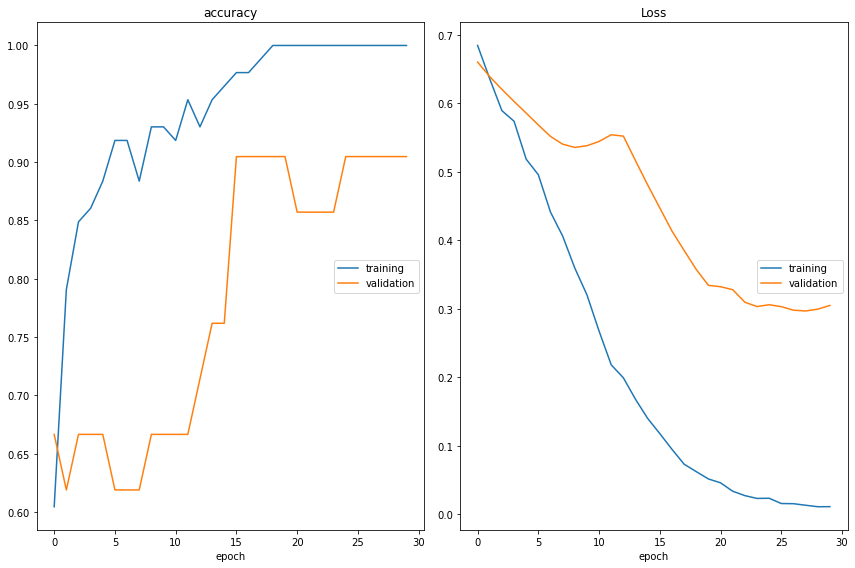

accuracy
	training         	 (min:    0.605, max:    1.000, cur:    1.000)
	validation       	 (min:    0.619, max:    0.905, cur:    0.905)
Loss
	training         	 (min:    0.011, max:    0.684, cur:    0.011)
	validation       	 (min:    0.297, max:    0.660, cur:    0.305)


In [171]:
from keras.callbacks import EarlyStopping

def load_data():
    normal_data = get_data(NORMAL_INPUT_DATA_DIR)
    fault_data = get_data(FAULT_INPUT_DATA_DIR)
    data = np.concatenate((normal_data, fault_data))
    labels = np.concatenate((np.zeros(len(normal_data)), np.ones(len(fault_data))))
    return data, labels

def create_model(data):
    layer = tf.keras.layers.Normalization(axis=2, input_shape=(n_timesteps,n_features))
    layer.adapt(data)
#     print(layer(data))
    model = Sequential()
    model.add(layer)
    model.add(LSTM(100))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    opt = keras.optimizers.Adam(learning_rate=0.0002)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

def train_and_evaluate_model(model, data_train, labels_train, data_test, labels_test):
    
#     es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40, min_delta=0.01) 

    return model.fit(data_train, labels_train,validation_data=(data_test, labels_test), epochs=30, batch_size=16, verbose=0,callbacks=[PlotLossesKeras()],)

n_splits = 5
data, labels = load_data()
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

history = []
models = []
conf_mat =[]
for i,(train, test) in enumerate(skf.split(data, labels)):
    print("Running Fold", i+1, "/", n_folds)
#     model = None # Clearing the NN.
    models.append(create_model(dataset))
    history.append(train_and_evaluate_model(models[i], data[train], labels[train], data[test], labels[test]))
    y_pred = models[i].predict(dataset)
    conf_mat.append(sklearn.metrics.confusion_matrix(targets[test], y_pred[test].round()))
#     # Plot Confusion matrix
#     sns.heatmap(matrix, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('True Values');
#     plt.show();

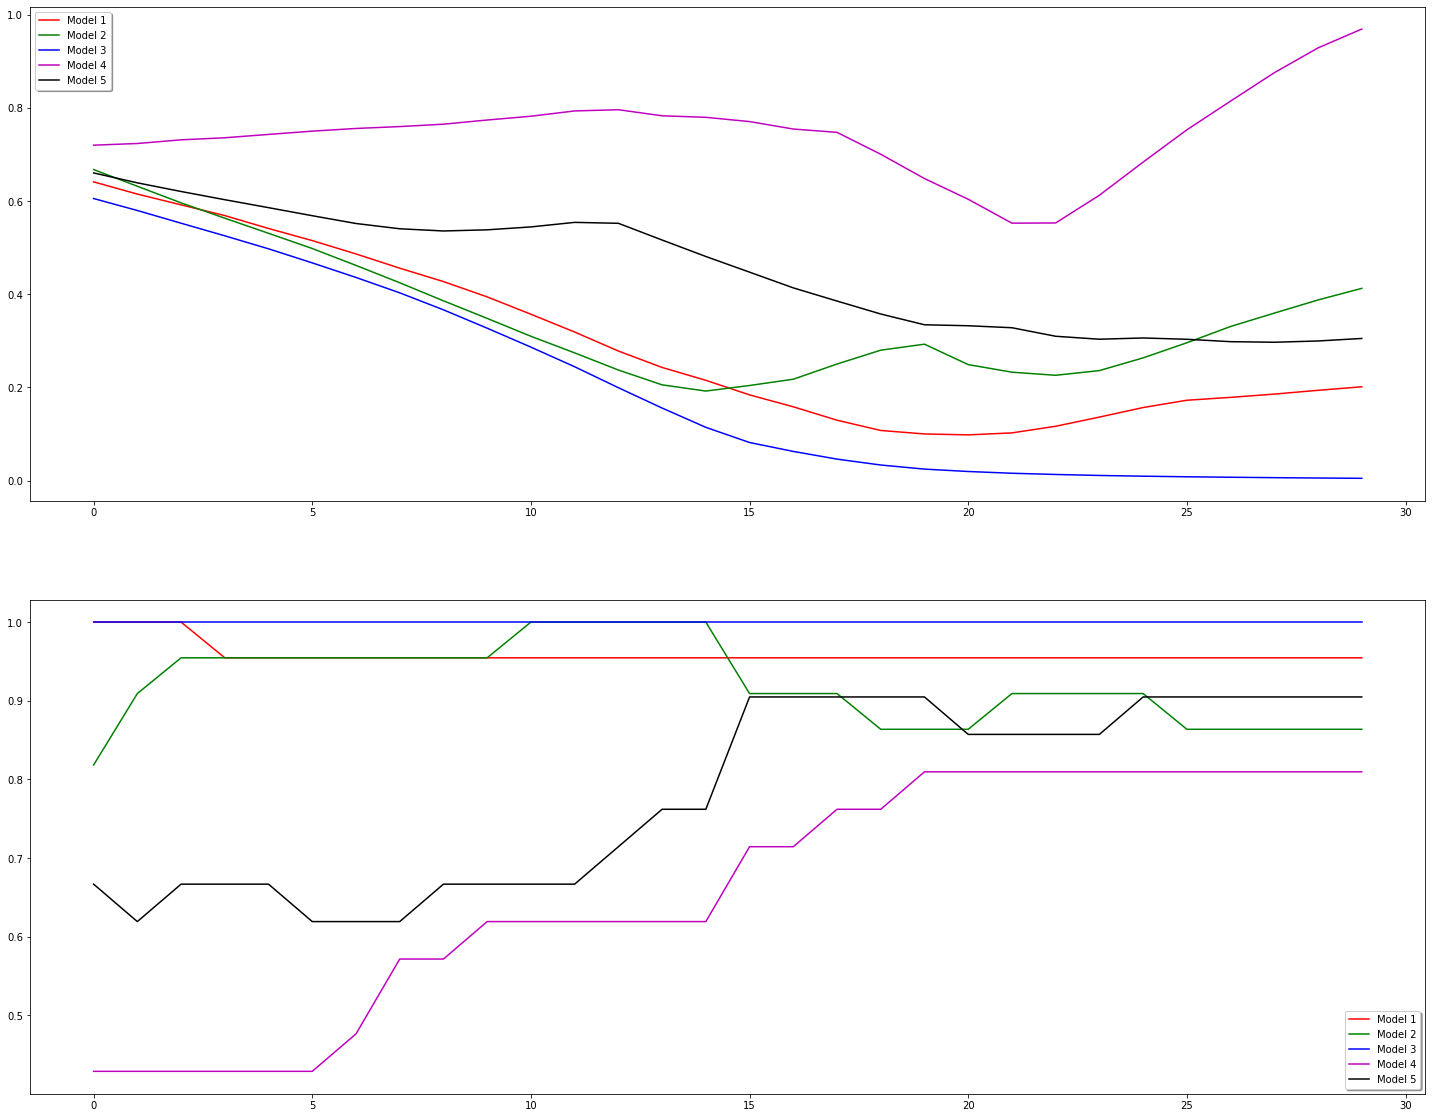

In [172]:
fig, ax = plt.subplots(2,1, figsize=(25, 20))

colors = ['r','g','b','m','k','c','y']

val_acc = []
val_loss = []

for i, his in enumerate(history):
    name = "Model "+str(i+1)
    ax[0].plot(his.history['val_loss'], color=colors[i], label=name)
    ax[1].plot(his.history['val_accuracy'], color=colors[i], label=name)
    val_acc.append(his.history['val_accuracy'])
    val_loss.append(his.history['val_loss'])
legend = ax[0].legend(loc='best', shadow=True)
legend = ax[1].legend(loc='best', shadow=True)

In [173]:
avg_val_acc = np.average(val_acc, axis=0)
avg_val_loss = np.average(val_loss, axis=0)

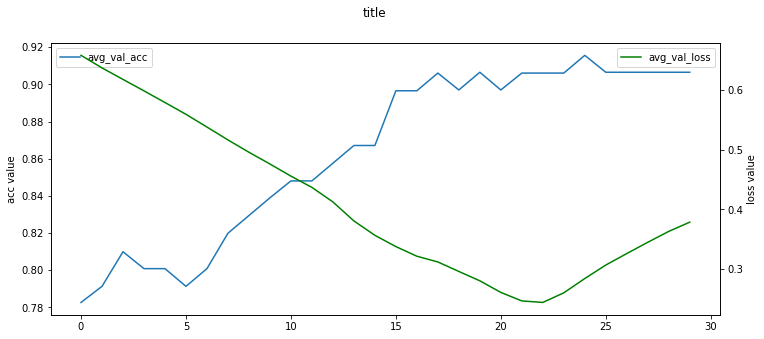

In [174]:
fig = plt.figure(figsize=(12,5))
fig.suptitle("title")
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

ax1.plot(avg_val_acc, label = 'avg_val_acc')

ax2.plot(avg_val_loss, color='green', label = 'avg_val_loss')

ax1.set_ylabel("acc value")
ax2.set_ylabel("loss value")

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

plt.show()

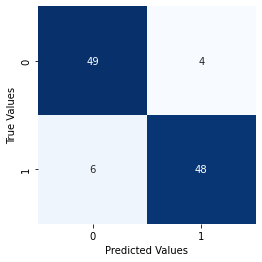

In [176]:
matrix = np.array(conf_mat).sum(axis=0)

sns.heatmap(matrix, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();